In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
nodes = pd.read_csv('data/Jeju_nodes.csv')
links = pd.read_csv('data/Jeju_links.csv')

nodes = nodes[['Id','NODE_NAME','latitude','longitude']]
links = links[['Source','Target']]

In [3]:
source_in = links['Source'].apply(lambda x : x in list(nodes['Id'])) # check Sources are in jeju_id
target_in = links['Target'].apply(lambda x : x in list(nodes['Id'])) # check Targets are in jeju_id
# source_in and target_in are boolean type pandas.Series which contains True or False
Jeju_links = links[source_in & target_in] # contain if both target and source are contained in jeju_id

In [4]:
G = nx.Graph()
# R is the Earth's radius
R = 6371e3

for idx,row in nodes.iterrows():
    # add node to Graph G
    G.add_node(row['Id'],Label=row['NODE_NAME'],latitude=row['latitude'], longitude=row['longitude'])

for idx,row in Jeju_links.iterrows():
    ## Calculate the distance between Source and Target Nodes
    lon1 = float(nodes[nodes['Id'] == row['Source']]['longitude'] * np.pi/180)
    lat1 = float(nodes[nodes['Id'] == row['Source']]['latitude'] * np.pi/180)
    lon2 = float(nodes[nodes['Id'] == row['Target']]['longitude'] * np.pi/180)
    lat2 = float(nodes[nodes['Id'] == row['Target']]['latitude'] * np.pi/180)
    d_lat = lat2 - lat1
    d_lon = lon2 - lon1
    a = np.sin(d_lat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_lon/2) ** 2
    c = 2 * np.arctan2(a**0.5, (1-a) ** 0.5)
    d = R * c
    
    # Link attribute : 'Source', 'Target' and weight = 'Length between them'
    G.add_edge(row['Source'],row['Target'],weight = d)
    
# make a dictionary for node position
pos = {}
for node in G.nodes(data=True):
    pos[node[0]] = [node[1]['longitude'], node[1]['latitude']]
print(pos)

C:\Flutter\bin\ipykernel_24268\3785656750.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lon1 = float(nodes[nodes['Id'] == row['Source']]['longitude'] * np.pi/180)
C:\Flutter\bin\ipykernel_24268\3785656750.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lat1 = float(nodes[nodes['Id'] == row['Source']]['latitude'] * np.pi/180)
C:\Flutter\bin\ipykernel_24268\3785656750.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lon2 = float(nodes[nodes['Id'] == row['Target']]['longitude'] * np.pi/180)
C:\Flutter\bin\ipykernel_24268\3785656750.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  

In [23]:
print(pos)

{4060029000: [126.5127347346484, 33.25467814707047], 4060187801: [126.39331824294078, 33.3024873661656], 4060014200: [126.42782476383329, 33.2404562739723], 4050113000: [126.66792100831752, 33.52942592719583], 4050113700: [126.702717929053, 33.54334954146162], 4050113900: [126.6932062073186, 33.55002376661831], 4060000800: [126.47803908071752, 33.25115167041846], 4060003403: [126.59540181065704, 33.25962426766102], 4060004001: [126.61229309537156, 33.26116974199154], 4060004201: [126.42824562364277, 33.258049186504984], 4060073300: [126.46710231534338, 33.26342101570304], 4060073400: [126.47432673540348, 33.25617183962819], 4060073900: [126.51402343485148, 33.23660747588405], 4060074300: [126.47565173166736, 33.236257363515506], 4060076200: [126.56110683376158, 33.246856539127634], 4050000503: [126.48995924541543, 33.41828117736001], 4050000600: [126.6166982925766, 33.41910314773771], 4050129700: [126.25849982886706, 33.30482457146785], 4050130300: [126.25913909918388, 33.4094155336075

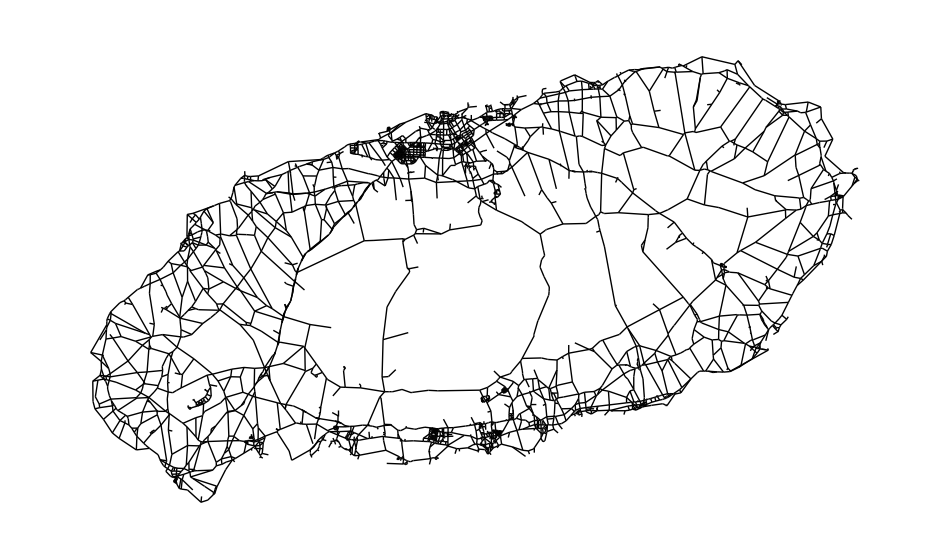

In [6]:
# "G" is a network, "nodelist" is a list of node to select
def draw(G, nodelist=None, select_color = 'red'):
    plt.figure(figsize= (12, 7))
    plt.axis('off')
    nx.draw_networkx(G, pos=pos, node_size = 0, with_labels=False)
    if nodelist != None:
        nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_color=select_color, node_size=1)
        edge_colors = [select_color if (u in nodelist and v in nodelist) else 'black' for u, v in G.edges()]
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
    plt.show()

draw(G)


In [ ]:
for edge in G.edges(data=True):
    print(edge)

Start node: 4060137600
Number of selected Node: 3323


C:\Flutter\bin\ipykernel_24268\2156286350.py:9: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edge_color=edge_colors)


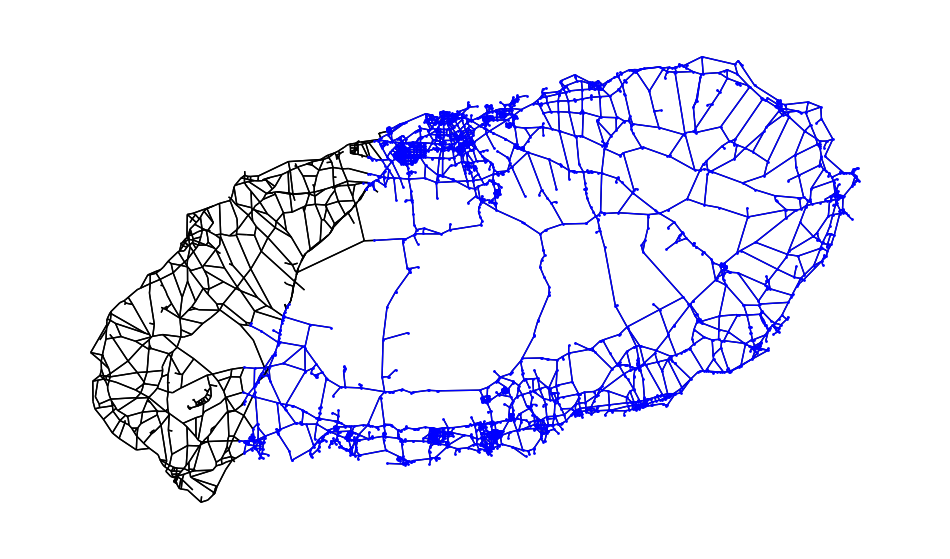

In [7]:
import random

random_node = random.choice(list(G.nodes()))

# "G" is network, "start_node" is node_id, "distance" is maximum distance
# return is list of selcted node_id 
def propagation(G, start_node, distance=5000):
    print(f"Start node: {start_node}")
    shortest_paths = nx.single_source_dijkstra_path_length(G, start_node, cutoff=distance, weight='weight')
    print(f"Number of selected Node: {len(shortest_paths)}")
    return [node for node, distance in shortest_paths.items() if distance <= distance]

nodes_within_distance = propagation(G, random_node, 40000)
draw(G, nodes_within_distance, 'blue')